# import modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# to display stats about the given data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#to display basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#displaying no of samples on each class
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# preprocessing the dataset

In [6]:
#check if any null value is there
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# eda

<Axes: >

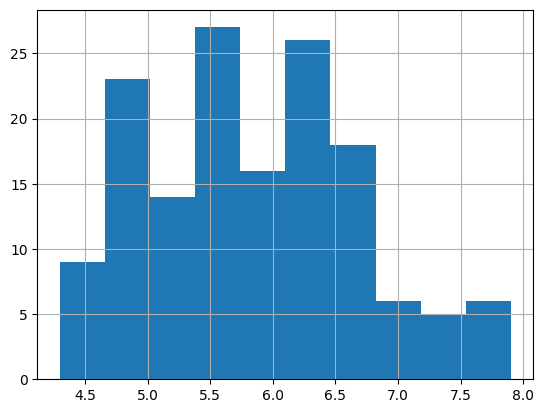

In [7]:
#histograms
df["sepal_length"].hist()

<Axes: >

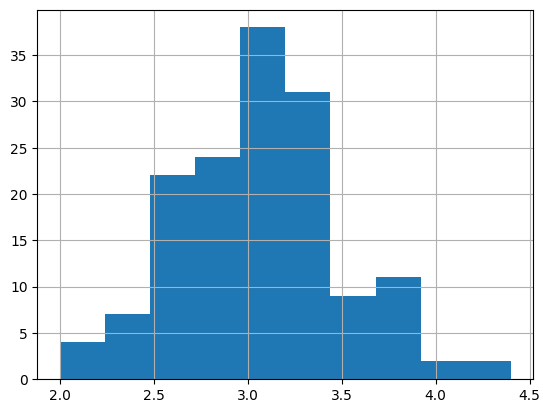

In [8]:
df["sepal_width"].hist()

<Axes: >

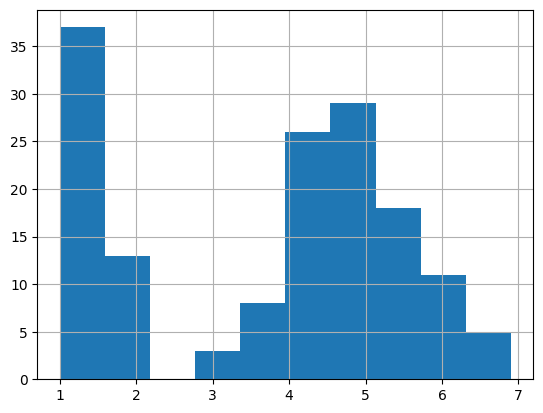

In [9]:
df["petal_length"].hist()

<Axes: >

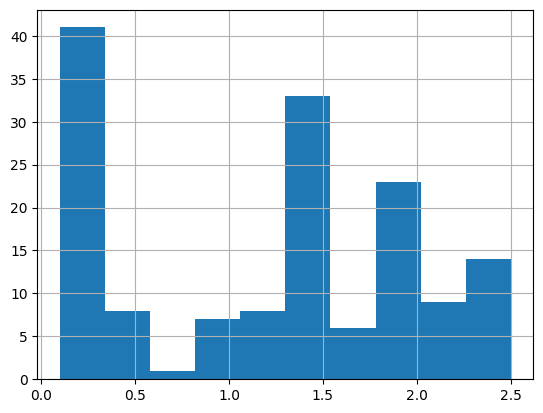

In [10]:
df["petal_width"].hist()

In [11]:
#scatterplot
col = ['red', 'yellow', 'blue']
species =["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

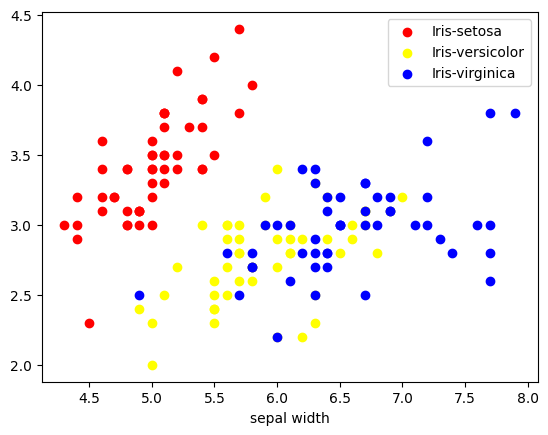

In [12]:
for i in range (3):
    x= df[df["species"]== species[i]]
    plt.scatter(x["sepal_length"], x["sepal_width"], c= col[i], label = species[i])
plt.xlabel("sepal length")
plt.xlabel("sepal width")
plt.legend()

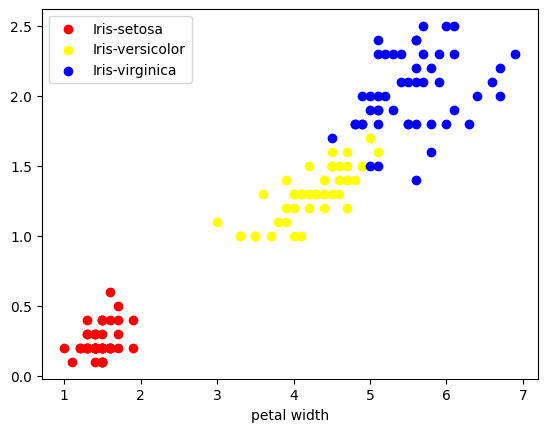

In [13]:
for i in range (3):
    x= df[df["species"]== species[i]]
    plt.scatter(x["petal_length"], x["petal_width"], c= col[i], label = species[i])
plt.xlabel("petal length")
plt.xlabel("petal width")
plt.legend()

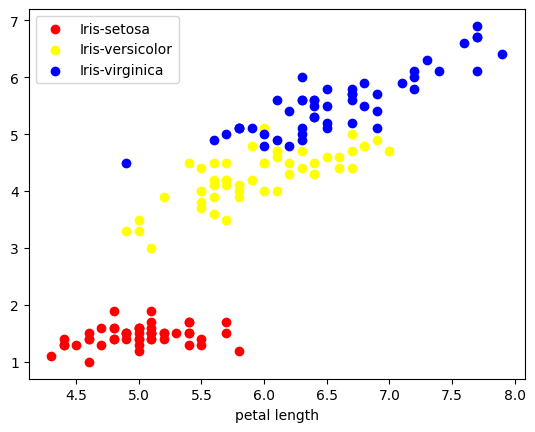

In [14]:
for i in range (3):
    x= df[df["species"]== species[i]]
    plt.scatter(x["sepal_length"], x["petal_length"], c= col[i], label = species[i])
plt.xlabel("sepal length")
plt.xlabel("petal length")
plt.legend()

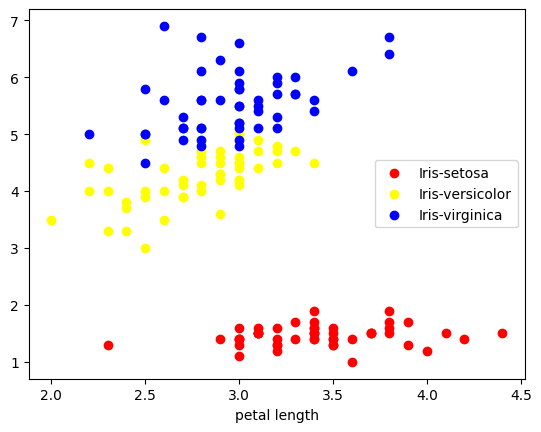

In [15]:
for i in range (3):
    x= df[df["species"]== species[i]]
    plt.scatter(x["sepal_width"], x["petal_length"], c= col[i], label = species[i])
plt.xlabel("sepal width")
plt.xlabel("petal length")
plt.legend()

# correaltion matrix-

In [16]:
#table showing relation b/w variables, each cell shows correlaion b/w two variables range is -1 to 1.
df.corr()

C:\Users\heg-user\AppData\Local\Temp\ipykernel_3244\2545056308.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


C:\Users\heg-user\AppData\Local\Temp\ipykernel_3244\898490907.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

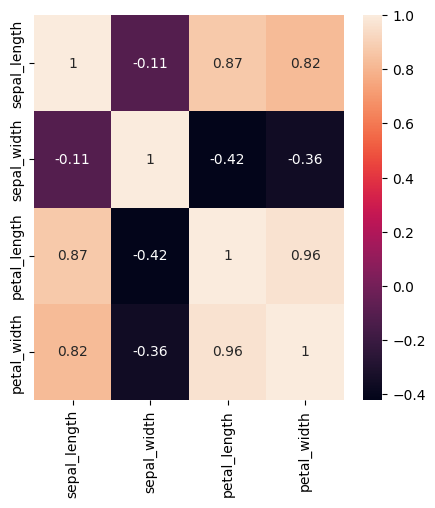

In [17]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot = True, ax = ax)

C:\Users\heg-user\AppData\Local\Temp\ipykernel_3244\2139367875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

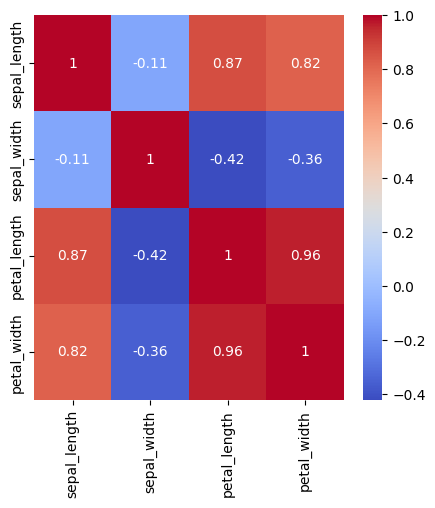

In [18]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot = True, ax = ax, cmap ='coolwarm')

# label encoder

In [19]:
#converting labels into numeric form so that it is machine-redable form
from  sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

In [20]:
df['species'] = l.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# model_training


In [21]:
from sklearn.model_selection import train_test_split
#train-70, test-30
x = df.drop(columns = ['species'])
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)


In [22]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
model.fit(x_train, y_train)

C:\Users\heg-user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
#printing matrix to get performance
print("accuracy:", model.score(x_test, y_test))

accuracy: 1.0


In [25]:
# accuracy in percentage

print("accuracy:", model.score(x_test, y_test)*100)

accuracy: 100.0


In [26]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [27]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [28]:
#printing matrix to get performance
print("accuracy:", model.score(x_test, y_test))

accuracy: 0.9777777777777777


In [29]:
# accuracy in percentage
print("accuracy:", model.score(x_test, y_test)*100)

accuracy: 97.77777777777777


In [30]:
#decisiontree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [31]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [32]:
#printing matrix to get performance
print("accuracy:", model.score(x_test, y_test))

accuracy: 0.8888888888888888


In [33]:
# accuracy in percentage
print("accuracy:", model.score(x_test, y_test)*100)

accuracy: 88.88888888888889
